"""
Que:-1. You are given a dataset with two numerical features Height and Weight. 
Your goal is to cluster these people into 3 groups using K-Means clustering. 
After clustering, you will visualize the clusters and their centroids. 
 Load the dataset (or generate random data for practice). 
 Apply K-Means clustering with k = 3. 
 Visualize the clusters and centroids. 
 Experiment with different values of k and see how the clustering changes. 
"""

In [7]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [8]:
df = pd.read_csv("C:/DataScience(Test)/HeightWeight.csv")

In [9]:
df.shape

(25000, 3)

In [10]:
df.columns

Index(['Index', 'Height(Inches)', 'Weight(Pounds)'], dtype='object')

In [11]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


Text(0, 0.5, 'Weight')

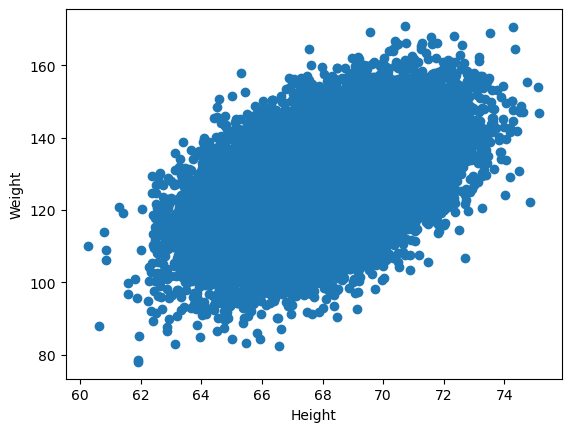

In [13]:
#draw a scatter plot of initial datapoints
plt.scatter(df['Height(Inches)'],df['Weight(Pounds)'])
plt.xlabel("Height")
plt.ylabel("Weight")


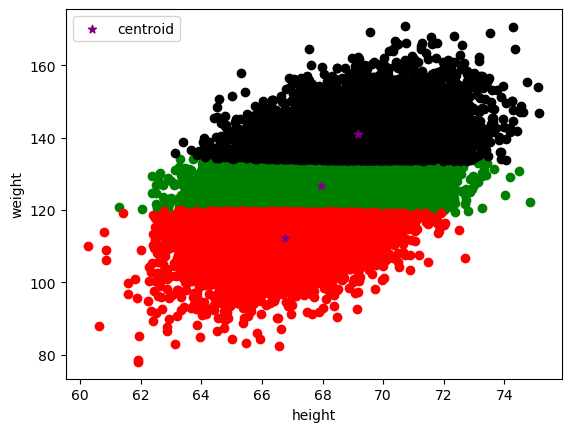

In [17]:
#Apply KMeans clustering for number of cluster = 3
km = KMeans(n_clusters=3)
y_predict = km.fit_predict(df[['Height(Inches)','Weight(Pounds)']])
df['cluster']=y_predict
df.head()
km.cluster_centers_

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['Height(Inches)'],df1['Weight(Pounds)'],color="green")
plt.scatter(df2['Height(Inches)'],df2['Weight(Pounds)'],color="black")
plt.scatter(df3['Height(Inches)'],df3['Weight(Pounds)'],color="red")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="centroid")
plt.xlabel("height")
plt.ylabel("weight")
plt.legend()


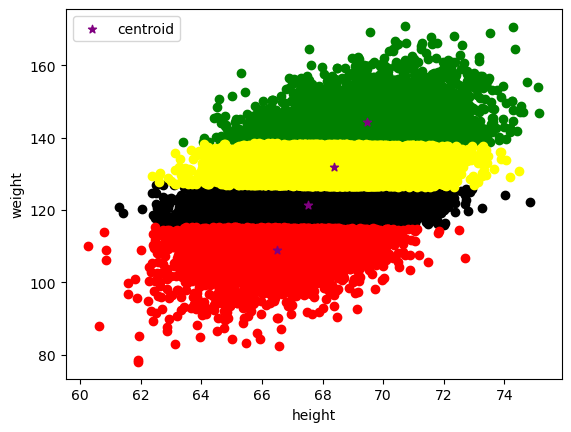

In [18]:
#Apply KMeans clustering for number of cluster = 4
km = KMeans(n_clusters=4)
y_predict = km.fit_predict(df[['Height(Inches)','Weight(Pounds)']])
df['cluster']=y_predict
df.head()
km.cluster_centers_

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1['Height(Inches)'],df1['Weight(Pounds)'],color="green")
plt.scatter(df2['Height(Inches)'],df2['Weight(Pounds)'],color="black")
plt.scatter(df3['Height(Inches)'],df3['Weight(Pounds)'],color="red")
plt.scatter(df4['Height(Inches)'],df4['Weight(Pounds)'],color="yellow")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="*",label="centroid")
plt.xlabel("height")
plt.ylabel("weight")
plt.legend()


Que:- 2). You have a dataset of  customers with features Age, Annual Income, and 
Spending Score. You need to apply hierarchical clustering to segment these 
customers. Plot a dendrogram to decide the optimal number of clusters and 
compare it with K-Means clustering results. 
Steps: 
 Load the dataset. 
 Apply hierarchical clustering. 
 Plot a dendrogram and choose the number of clusters. 
 Apply K-Means clustering with the same number of clusters. 
 Compare the results. 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

In [32]:
df = pd.read_csv("C:/DataScience(Test)/Mall_Customers.csv")

In [33]:
df.shape

(200, 5)

In [34]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [35]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [37]:
#apply normalization to convert all values in between 0 to 1
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return x
    

In [38]:
df_norm = norm_fun(df.iloc[:,2:])
df_norm.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


In [39]:
#Hierarchical clustering 
z=linkage(df_norm,method="complete",metric="euclidean")

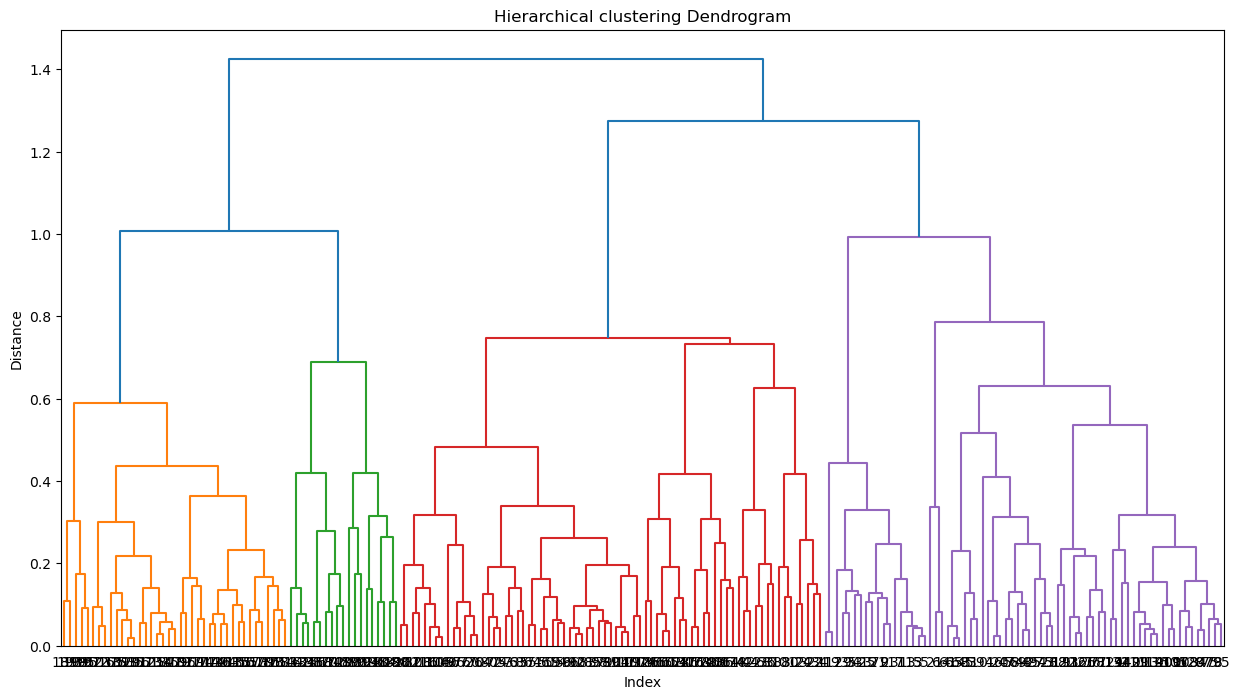

In [40]:
plt.figure(figsize=(15,8))
plt.title("Hierarchical clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Distance")
sch.dendrogram(z,leaf_rotation=0,leaf_font_size=10)
plt.show()

In [41]:
# Perform Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
h_complete=AgglomerativeClustering(n_clusters=3,linkage='complete',metric="euclidean")
#######affinity has been depricated,use metric
#apply labels to the clusters
labels=h_complete.fit_predict(df_norm)
# Convert labels to a pandas Series
cluster_labels = pd.Series(labels)
print(cluster_labels)
#assign this series to Univ DataFrame as columns and namethe columns 
df['clust']=cluster_labels
#we want to relocate the column 5 to 4th position
df1=df.iloc[:,[5,1,2,3,4]]
#now check the df1 dataframe


df1.iloc[:,1:].groupby(df1.clust).mean()



0      1
1      1
2      1
3      1
4      1
      ..
195    0
196    0
197    0
198    0
199    0
Length: 200, dtype: int64


C:\Users\om\AppData\Local\Temp\ipykernel_20404\3415648828.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.iloc[:,1:].groupby(df1.clust).mean()


,Age,Annual Income (k$),Spending Score (1-100)
clust,,,
0,33.293103,89.155172,60.431034
1,27.275362,42.782609,56.376812
2,54.205479,54.643836,36.232877


In [42]:
#from output clust 0 has highest Annual income

Text(0, 0.5, 'Annual Income (k$)')

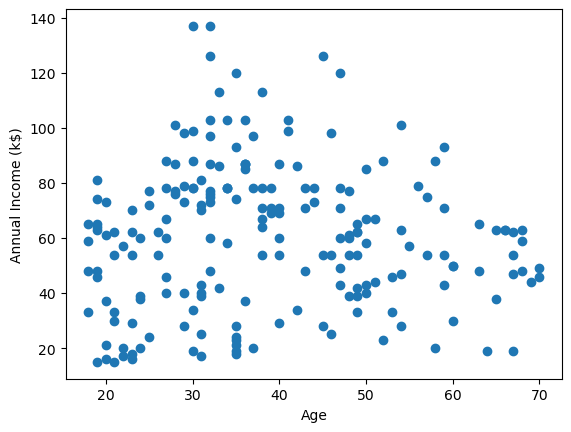

In [43]:
#KMeans clustering
#for initial data points
plt.scatter(df.Age,df['Annual Income (k$)'])
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

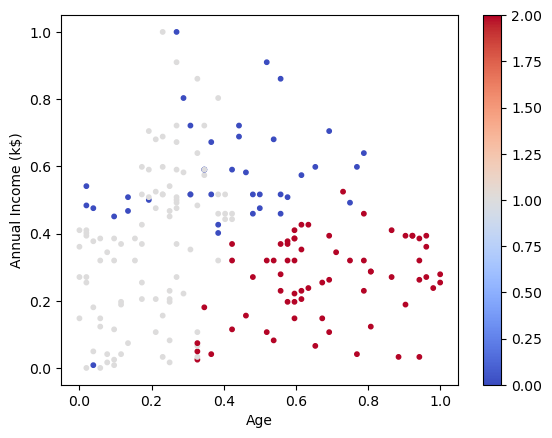

In [44]:
km = KMeans(n_clusters=3).fit(df_norm)
df_norm.plot(x="Age",y="Annual Income (k$)",kind="scatter",c=km.labels_,s=10,cmap=plt.cm.coolwarm)

In [45]:
#From KMeans clustering clust 0 has highest Annual Income (k$) 

In [ ]:
#By comparing hirarchical clustering and kmeans we got same result 

Que:- 3). Evaluate clustering performance using the Silhouette Score and Elbow 
Method on the Wine dataset. Determine the optimal number of clusters. 
Note : Load the wine dataset from sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("C:/Assignments(DS)/wine.csv")

In [3]:
df.shape

(178, 14)

In [4]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
def norm_fun(i):
    x=(i-i.max())/(i.max()-i.min())
    return x

In [6]:
df_norm=norm_fun(df)
df_norm.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.0,-0.157895,-0.808300,-0.427807,-0.742268,-0.380435,-0.372414,-0.426160,-0.716981,-0.406940,-0.627986,-0.544715,-0.029304,-0.438659
1,-1.0,-0.428947,-0.794466,-0.582888,-0.969072,-0.673913,-0.424138,-0.489451,-0.754717,-0.725552,-0.735495,-0.536585,-0.219780,-0.449358
2,-1.0,-0.439474,-0.679842,-0.299465,-0.587629,-0.663043,-0.372414,-0.388186,-0.679245,-0.242902,-0.624573,-0.552846,-0.304029,-0.353067
3,-1.0,-0.121053,-0.760870,-0.390374,-0.680412,-0.532609,-0.010345,-0.335443,-0.792453,-0.441640,-0.443686,-0.691057,-0.201465,-0.142653
4,-1.0,-0.418421,-0.634387,-0.192513,-0.463918,-0.478261,-0.372414,-0.504219,-0.509434,-0.555205,-0.740614,-0.544715,-0.391941,-0.674037


In [7]:
TWSS=[]
k=list(range(2,8))
for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)

In [8]:
TWSS

[74.97726356459917,
 49.84918136799645,
 47.835740783055655,
 45.47236353603813,
 42.08287258739922,
 39.3614429380724]

Text(0, 0.5, 'Total within sum of square')

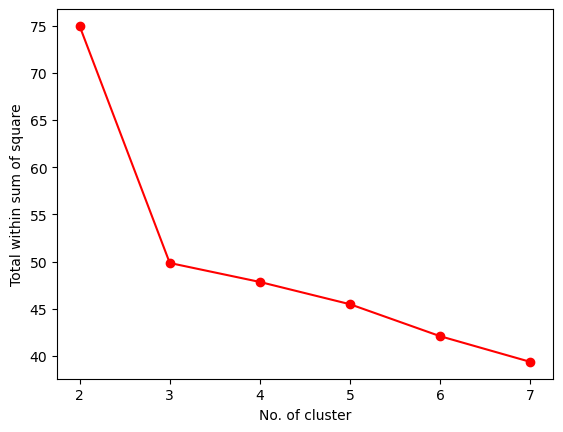

In [9]:
#elbow curve
plt.plot(k,TWSS,'ro-')
plt.xlabel("No. of cluster")
plt.ylabel("Total within sum of square")

In [10]:
model=KMeans(n_clusters=3)
model.fit(df_norm)
model.labels_
mb=pd.Series(model.labels_)
df['clust']=mb

In [11]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clust
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [14]:
#relocate the columns
df = df.iloc[:,[14,0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
df.head()

,clust,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,2,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,2,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [15]:
df.iloc[:,1:].groupby(df.clust).mean()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clust,,,,,,,,,,,,,,
0,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020
1,2.000000,12.257246,1.908551,2.238551,20.063768,94.043478,2.252609,2.076232,0.362319,1.625652,3.057971,1.055739,2.786232,512.826087
2,1.016667,13.732167,2.005000,2.458000,17.253333,106.883333,2.847833,2.980833,0.288667,1.900333,5.492000,1.066167,3.163500,1113.533333
